In [227]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from ast import literal_eval
import seaborn as sns
from scipy import stats

In [76]:
sns.set_style(style='darkgrid')

In [266]:
from results.latest.conf import *
res_dir = "results/latest/"

In [273]:
csv = pd.read_csv(res_dir + 'model_vars.csv').set_index(['run', 'step'])
df = csv.drop('p_trans', axis=1)
df

tech_optimists  tech_pessimists      price   nf  \
run step                                                     
0   0                  25               25   9.998614  450   
    1                  25               25   9.998614  450   
    2                  25               24   9.998614  451   
    3                  26               23  10.008585  451   
    4                  27               22  10.001110  451   
...                   ...              ...        ...  ...   
    29995              35                5  10.093005  460   
    29996              35                5  10.097044  460   
    29997              35                5  10.097044  460   
    29998              35                5  10.093502  460   
    29999              36                5  10.093502  459   

           technical_fraction     slope  opinion_index    edt       edf  \
run step                                                                  
0   0                   0.100  0.000000       0.000000  0.000  0.006236   
    1                   0.100  0.000000       0.000000  0.000  0.006236   
    2                   0.098 -0.046189       0.020408  0.015  0.006249   
    3                   0.098 -0.034642       0.061224  0.045 -0.038720   
    4                   0.098 -0.027714       0.102041  0.075 -0.005005   
...                       ...       ...            ...    ...       ...   
    29995               0.080  0.069955       0.750000  0.450 -0.427824   
    29996               0.080  0.069955       0.750000  0.450 -0.446402   
    29997               0.080  0.069955       0.750000  0.450 -0.446402   
    29998               0.080  0.090147       0.750000  0.450 -0.430111   
    29999               0.082  0.075689       0.756098  0.465 -0.429176   

                 ed           ept       epf  
run step                                     
0   0      0.006236  5.543492e-08  0.000104  
    1      0.006236  5.543492e-08  0.000104  
    2      0.021249 -4.619521e-03  0.000104  
    3      0.006280 -3.461574e-03  0.000643  
    4      0.069995 -2.771099e-03  0.000083  
...             ...           ...       ...  
    29995  0.022176  6.927312e-03  0.006911  
    29996  0.003598  6.924381e-03  0.007208  
    29997  0.003598  6.924381e-03  0.007208  
    29998  0.019889  8.927527e-03  0.006948  
    29999  0.035824  7.495123e-03  0.006948  

[30000 rows x 12 columns]

In [274]:
p_trans = pd.DataFrame([{k: v[0] for k, v in row.items()} for row in csv.loc[0].p_trans.apply(literal_eval)])
p_trans.index.name = 'step'
u = pd.DataFrame([{k: v[1] for k, v in row.items()} for row in csv.loc[0].p_trans.apply(literal_eval)])
u.index.name = 'step'
p_trans

,Tech_O->Fundam,Tech_O->Tech_P,Tech_P->Tech_O,Tech_P->Fundam,Fundam->Tech_O,Fundam->Tech_P
step,,,,,,
0,0.010001,0.098384,0.098384,0.010001,0.009999,0.009999
1,0.010001,0.098384,0.098384,0.010001,0.009999,0.009999
2,0.010047,0.103035,0.093943,0.009955,0.009953,0.010045
3,0.010041,0.101852,0.095034,0.009972,0.009959,0.010028
4,0.010029,0.101149,0.095695,0.009973,0.009971,0.010027
...,...,...,...,...,...,...
29995,0.010000,0.091737,0.105513,0.010139,0.010000,0.009863
29996,0.010003,0.091737,0.105513,0.010142,0.009997,0.009860
29997,0.010003,0.091737,0.105513,0.010142,0.009997,0.009860


In [275]:
stats_df = pd.read_csv(res_dir + 'stats.csv').set_index('run')
stats_df

,seed,adfuller,acorr_ljungbox,kurtosis10,kurtosis60,kurtosis600
run,,,,,,
0,654.0,0.000153,0.0,2.740838,8.270497,5.272343


In [276]:
paired_palette_cols = sns.color_palette('Paired', n_colors=6).as_hex()
paired = {k: v for k, v in zip(p_trans.columns, paired_palette_cols)}
paired

{'Tech_O->Fundam': '#a6cee3',
 'Tech_O->Tech_P': '#1f78b4',
 'Tech_P->Tech_O': '#b2df8a',
 'Tech_P->Fundam': '#33a02c',
 'Fundam->Tech_O': '#fb9a99',
 'Fundam->Tech_P': '#e31a1c'}

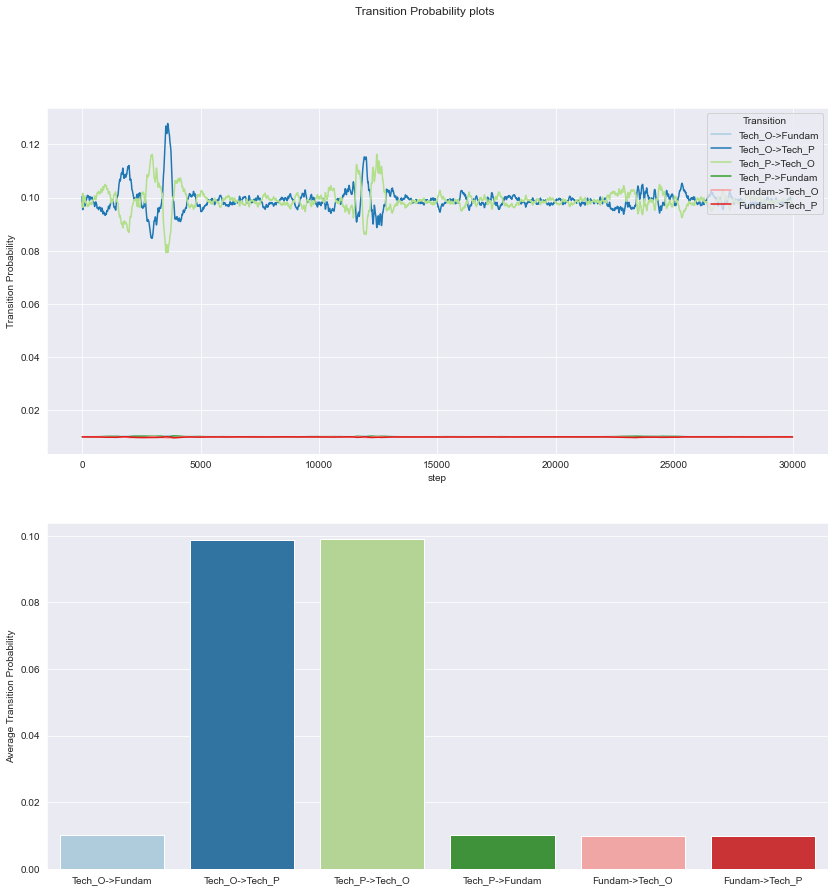

In [277]:
fig, axs = plt.subplots(2, 1, figsize=(14, 14))
fig.suptitle('Transition Probability plots')

data = p_trans.rolling(300, 1).mean().melt(var_name='Transition', ignore_index=False).reset_index()
ax = sns.lineplot(data=data, x='step', y='value', hue='Transition', palette=paired, ax=axs[0])
ax.set(ylabel = "Transition Probability")
sns.move_legend(ax, 'upper right')

ax = sns.barplot(data=p_trans, ax=axs[1], ci=None, palette=paired)
ax.set(ylabel = "Average Transition Probability")

plt.show()

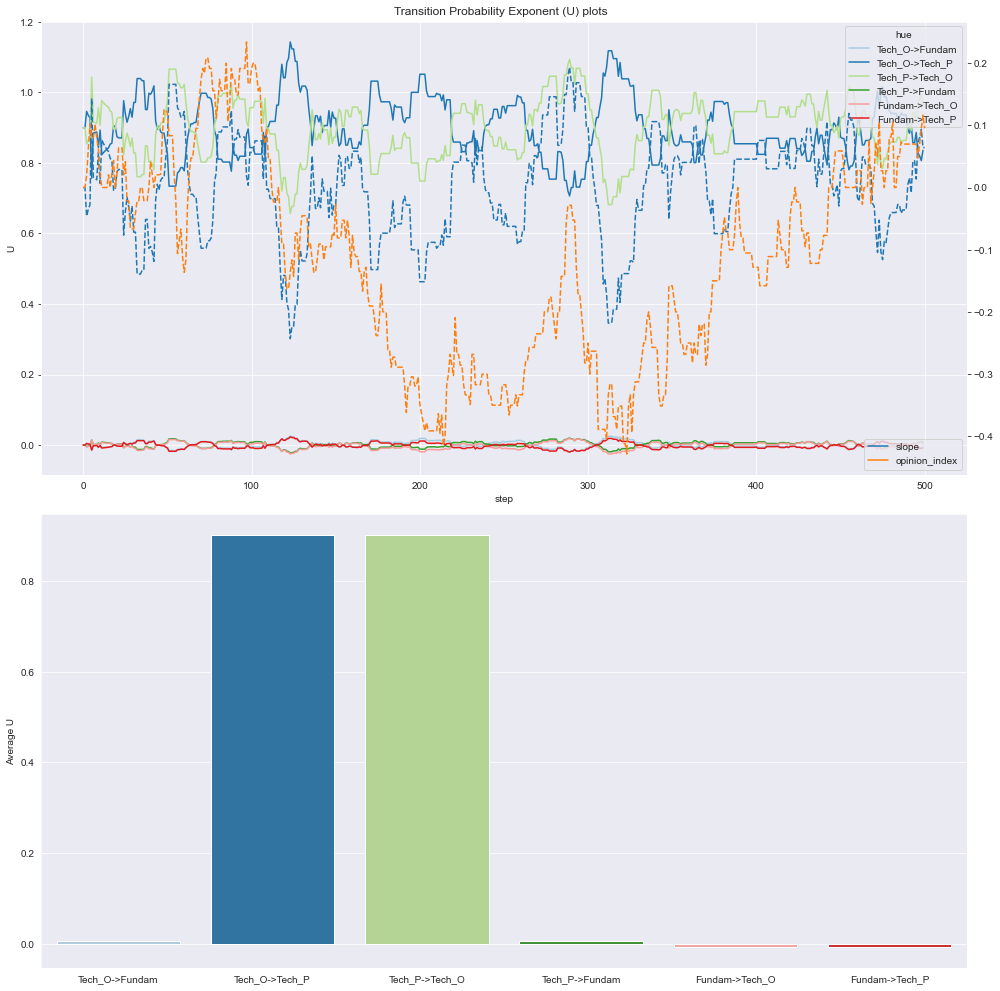

In [278]:
fig, axs = plt.subplots(2, 1, figsize=(14, 14))
fig.suptitle('Transition Probability Exponent (U) plots')
data = u[0:500].melt(var_name='hue', ignore_index=False).reset_index()
ax = sns.lineplot(data=data, x='step', y='value', hue='hue', palette=paired, ax=axs[0])
ax.set(ylabel="U")
sns.move_legend(ax, 'upper right')

twin = ax.twinx()
data = df.loc[0, ['slope', 'opinion_index']].loc[0:500]
sns.lineplot(data=data, ls='--', color='#8513d6', dashes=False)
sns.move_legend(twin, 'lower right')
twin.grid(False)

ax = sns.barplot(data=u, ax=axs[1], ci=None, palette=paired)
ax.set(ylabel="Average U")

plt.tight_layout()

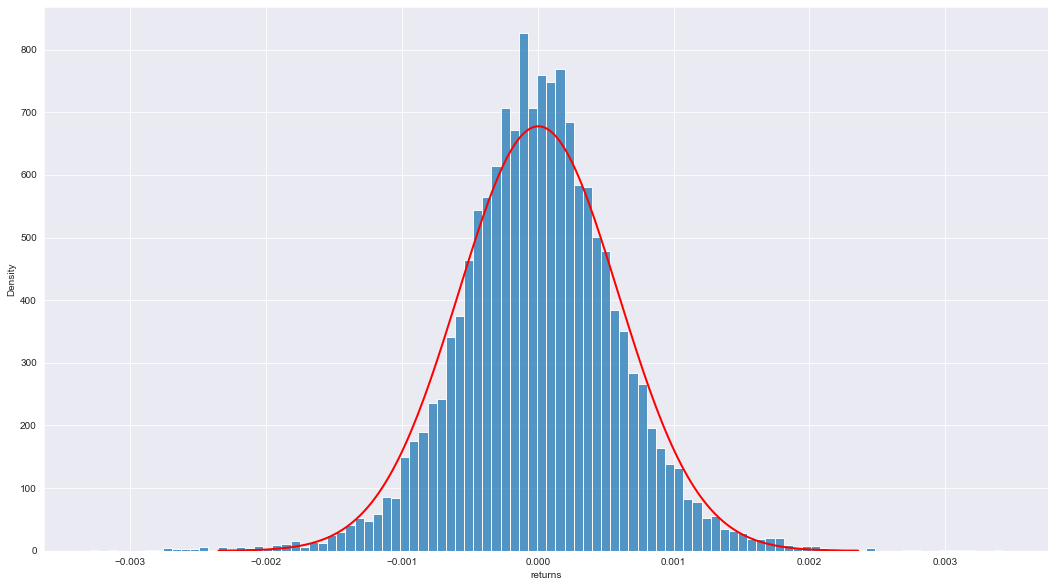

In [217]:
fig = plt.figure(figsize=(18,10))
data = df.reset_index().merge(stats_df, right_on='run', left_on='run').set_index(df.index)
data['returns'] = data.price.diff(1).rolling(30).mean()
ax = sns.histplot(data=data, x='returns', legend=False, bins=100, stat='density')

mean = data.returns.mean()
std = data.returns.std()
x = np.linspace(mean-4*std, mean+4*std, 200)
p = stats.norm.pdf(x, mean, std)
z = ax.plot(x, p, linewidth=2, c='r')

<AxesSubplot:xlabel='adfuller', ylabel='Count'>

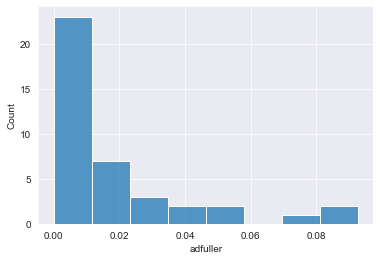

In [192]:
sns.histplot(stats_df.adfuller)